The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [149]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!

In [150]:
winners = pd.read_csv('data/nobel.csv')
winners

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN


Male      905
Female     65
Name: sex, dtype: int64
Male


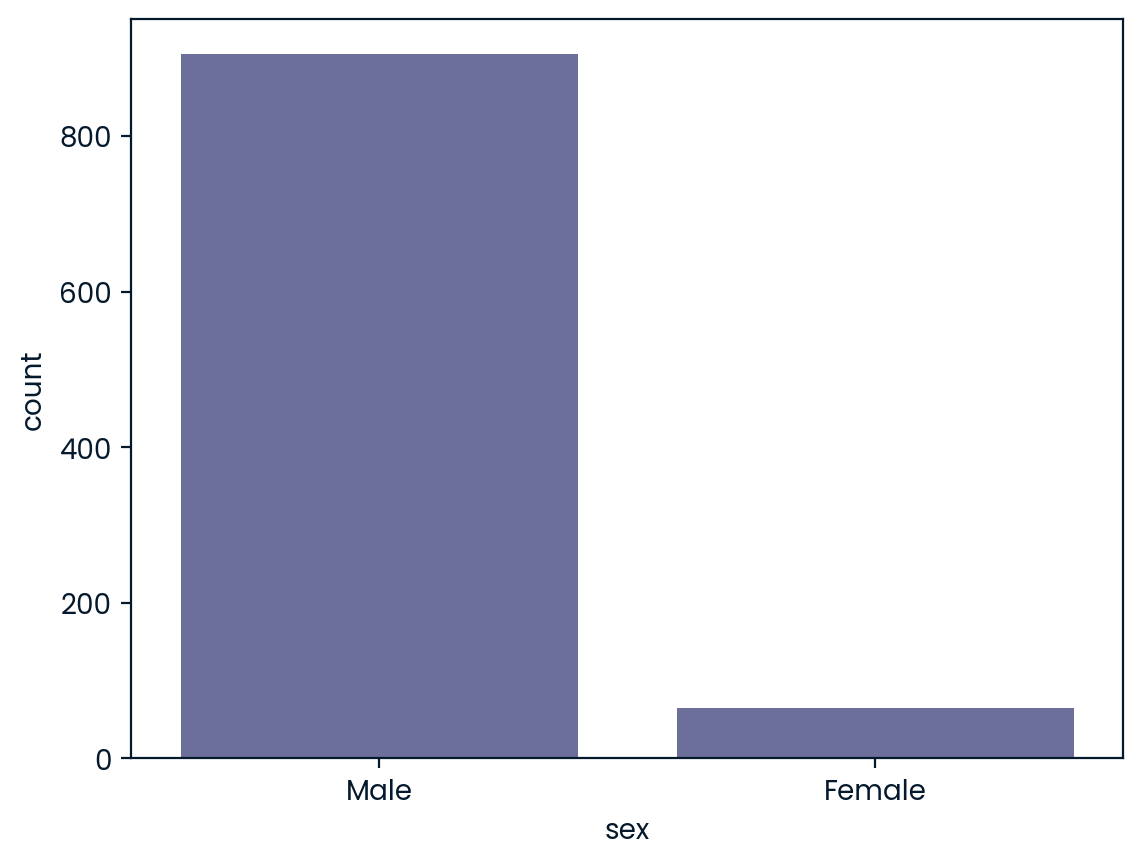

United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: birth_country, Length: 129, dtype: int64
United States of America


In [151]:
#Find the count of each gender
genders = winners['sex'].value_counts()
print(genders)

#Find the gender with the highest value
top_gender = genders.idxmax()
print(top_gender)

#Visualize the relationship betwen the genders
sns.countplot(x='sex', data=winners)
plt.show()

#Find the count of each country
countries = winners['birth_country'].value_counts()
print(countries)

#Find the country with the highest value
top_country = countries.idxmax()  
print(top_country)


decade
1900     57
1910     40
1920     54
1930     56
1940     43
1950     72
1960     79
1970    104
1980     97
1990    104
2000    123
2010    121
2020     50
dtype: int64
decade
1900     1
1910     3
1920     4
1930    14
1940    13
1950    21
1960    21
1970    33
1980    31
1990    42
2000    52
2010    38
2020    18
dtype: int64
2000


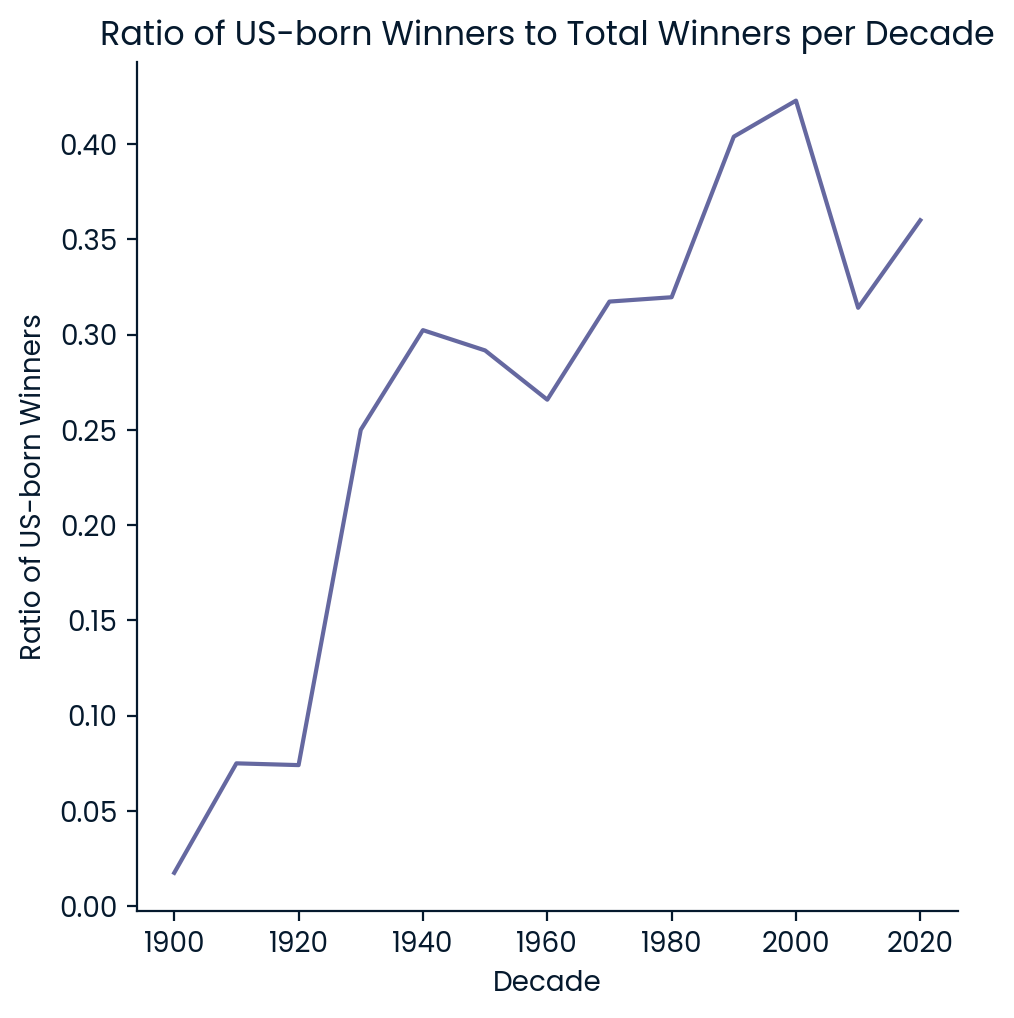

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to flag USA born winners
def flag_usa_born(winners):
    winners['usa_born_winner'] = winners['birth_country'] == 'United States of America'
    return winners

# Apply the function to the dataframe
winners = flag_usa_born(winners)

# Display the first few rows to verify the new column
winners.head()

# To create a decade column
winners['decade'] = (winners['year'] // 10) * 10
winners

# Calculate the total number of winners per decade
total_winners_per_decade = winners.groupby('decade').size()
print(total_winners_per_decade)

# Calculate the number of US-born winners per decade
usa_winners_per_decade = winners[winners['usa_born_winner']].groupby('decade').size()
print(usa_winners_per_decade)

# Calculate the ratio of US-born winners to total winners per decade
ratio_usa_winners = usa_winners_per_decade / total_winners_per_decade

# Find the decade with the highest ratio
max_decade_usa = ratio_usa_winners.idxmax()
print(max_decade_usa)

# Plot the ratio of US-born winners to total winners per decade
sns.relplot(x=ratio_usa_winners.index, y=ratio_usa_winners.values, kind='line')
plt.xlabel('Decade')
plt.ylabel('Ratio of US-born Winners')
plt.title('Ratio of US-born Winners to Total Winners per Decade')
plt.show()

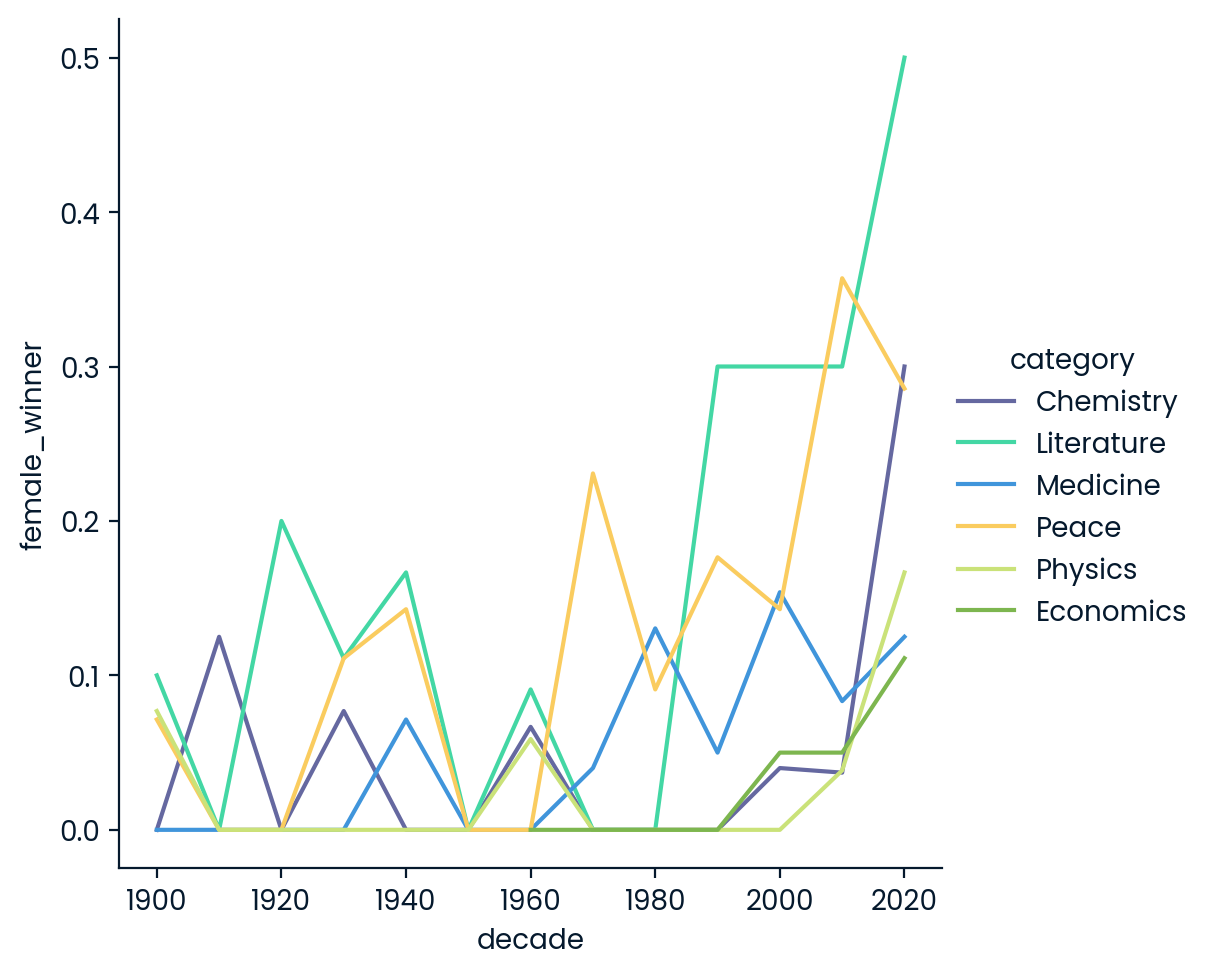

In [153]:
winners['female_winner'] = winners['sex'] == 'Female'
prop_female_winners = winners.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]
max_female_decade_category

# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

# Optional: Plotting female winners with % winners on the y-axis
ax2 = sns.relplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, kind="line")



In [154]:
# Get the female winner with the minimum year
fem_winners = winners[winners['sex'] == 'Female']
first_fem_winner = fem_winners[fem_winners['year'] == fem_winners['year'].min()]
first_fem_winner

# Get the first female winner's name and category
first_woman_name = first_fem_winner['full_name'].values[0]
first_woman_category = first_fem_winner['category'].values[0]

print(first_woman_name)
print(first_woman_category)

print(f'The first woman to win a Nobel Prize was {first_woman_name} in the category of {first_woman_category}.')

Marie Curie, née Sklodowska
Physics
The first woman to win a Nobel Prize was Marie Curie, née Sklodowska in the category of Physics.


In [155]:
#Find the number of times each winner has won
repeats = winners['full_name'].value_counts()
repeats

#Find the winners that have won more than 2 times
repeats_count = repeats[repeats >= 2].index

#Turn the names to a list
repeat_list= list(repeats_count)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']